# Pandas 시각화 (2) - LinePlot, BarPlot

## #01. 준비작업

### [1] 패키지 참조

In [1]:
import sys
from pandas import read_excel
from matplotlib import pyplot as plt

### [2] 그래프 전역 설정

In [2]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 9
plt.rcParams["figure.figsize"] = (15, 6)
plt.rcParams['figure.dpi'] = 200
plt.rcParams["axes.unicode_minus"] = False

## #02. Line Plot

### [1] 데이터 가져오기

2023년 12월 01일부터 2023년 12월 31일까지 벤츠, BMW, 아우디에 대한 구간별 검색량의 상대적 비율.

(구간별 결과에서 가장 큰 값을 100으로 설정한 상댓값)

> 출처: 네이버 OpenAPI 연동 결과 저장
>
> 데이터 유형에 따라 그래프의 종류가 결정되므로 단원별로 데이터를 개별적으로 가져오기로 한다.

In [3]:
df1 = read_excel(
    "https://data.hossam.kr/pydata/naver_search_trend.xlsx", index_col='DATE')
df1

,BENZ,BMW,AUDI
DATE,,,
2023-12-01,48.60475,67.90340,23.16152
2023-12-02,51.86098,68.63919,23.87382
2023-12-03,51.72008,68.72529,23.95209
2023-12-04,51.87663,67.08935,23.61160
2023-12-05,55.30116,68.33392,23.21239
2023-12-06,54.50275,70.95221,23.70553
2023-12-07,55.56338,68.44350,24.57046
2023-12-08,58.31865,69.22625,25.99115
2023-12-09,60.40859,71.66451,24.39826


### [2] 단일 변수에 대한 시각화

DataFrame은 내부적으로 `pyplot` 객체를 초기화고 있기 때문에 그래프 초기화 메서드인 `plt.figure()`를 호출할 필요가 없다. 

그러므로 그래프의 사이즈를 설정하기 위한 `figsize` 파라미터는 그래프를 생성하는 `plot()` 메서드에서 직접 지정해야 한다.

`figsize` 파라미터를 설정하지 않을 경우 `rcParams`로 설정한 기본 크기를 따른다.

DataFrame의 index가 x축을 담당한다.

기본적으로 DataFrame의 변수 이름이 label이 되지만 `plot()` 메서드에 label 파라미터를 설정하여 다른 이름으로 변경할 수 있다.

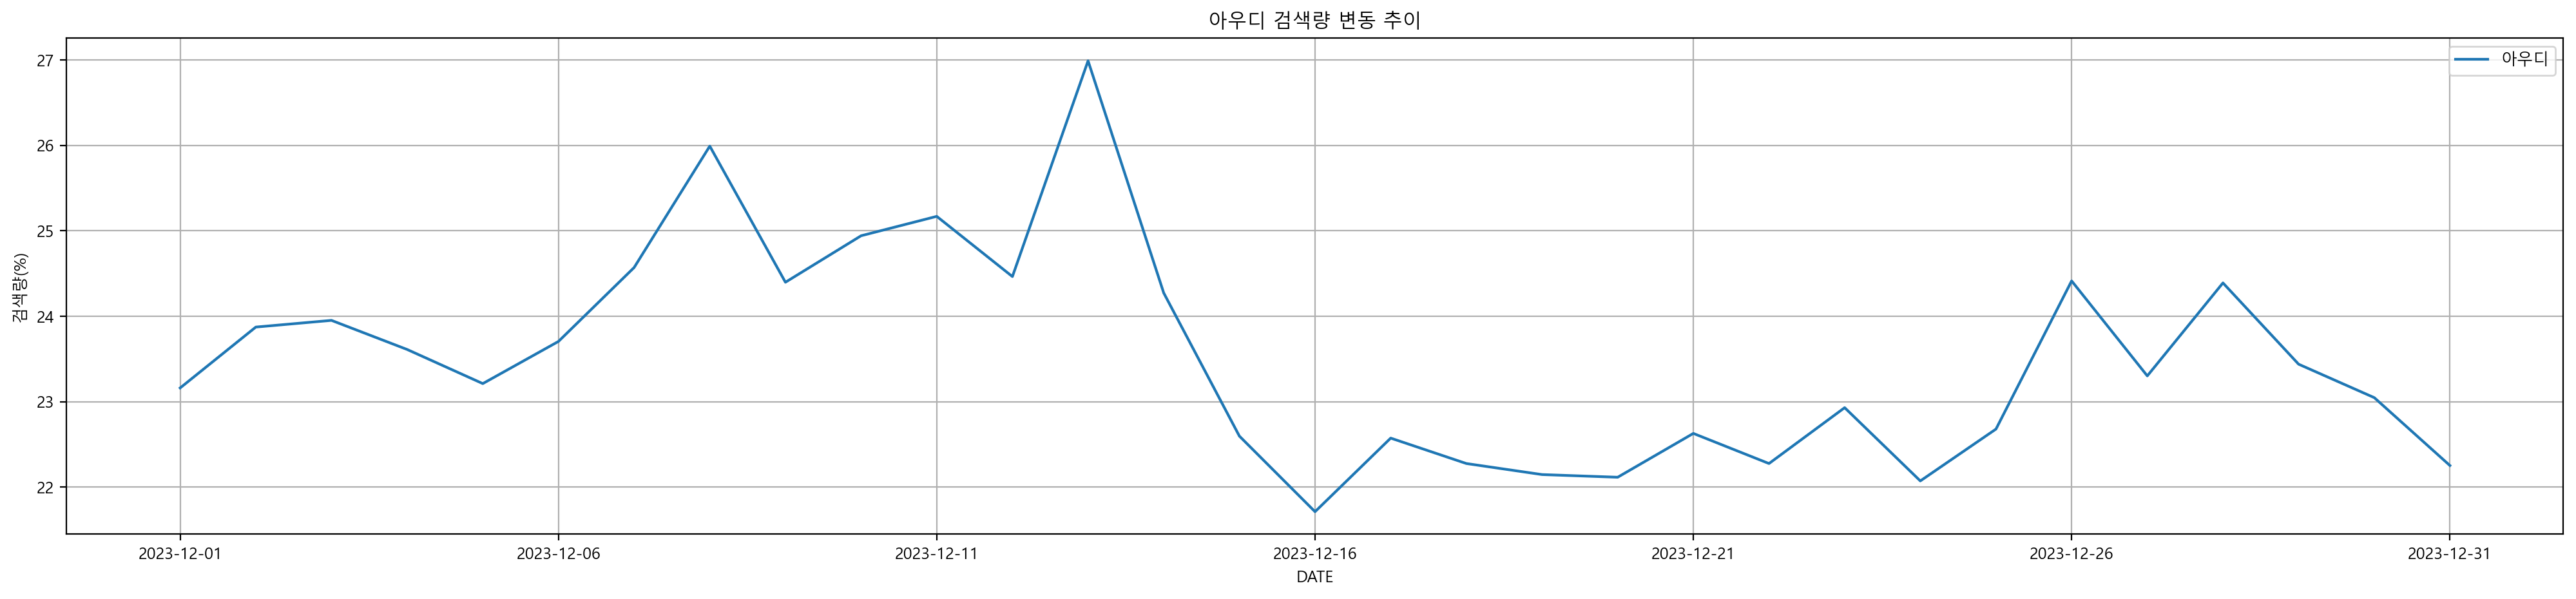

In [4]:
df1['AUDI'].plot(label='아우디', figsize=(25, 5))
plt.grid()
plt.legend()
plt.title("아우디 검색량 변동 추이")
plt.ylabel("검색량(%)")
plt.show()
plt.close()

### [3] 복수 변수에 대한 시각화

표시할 변수만 별도의 데이터프레임으로 추출한 후 그래프를 적용한다.

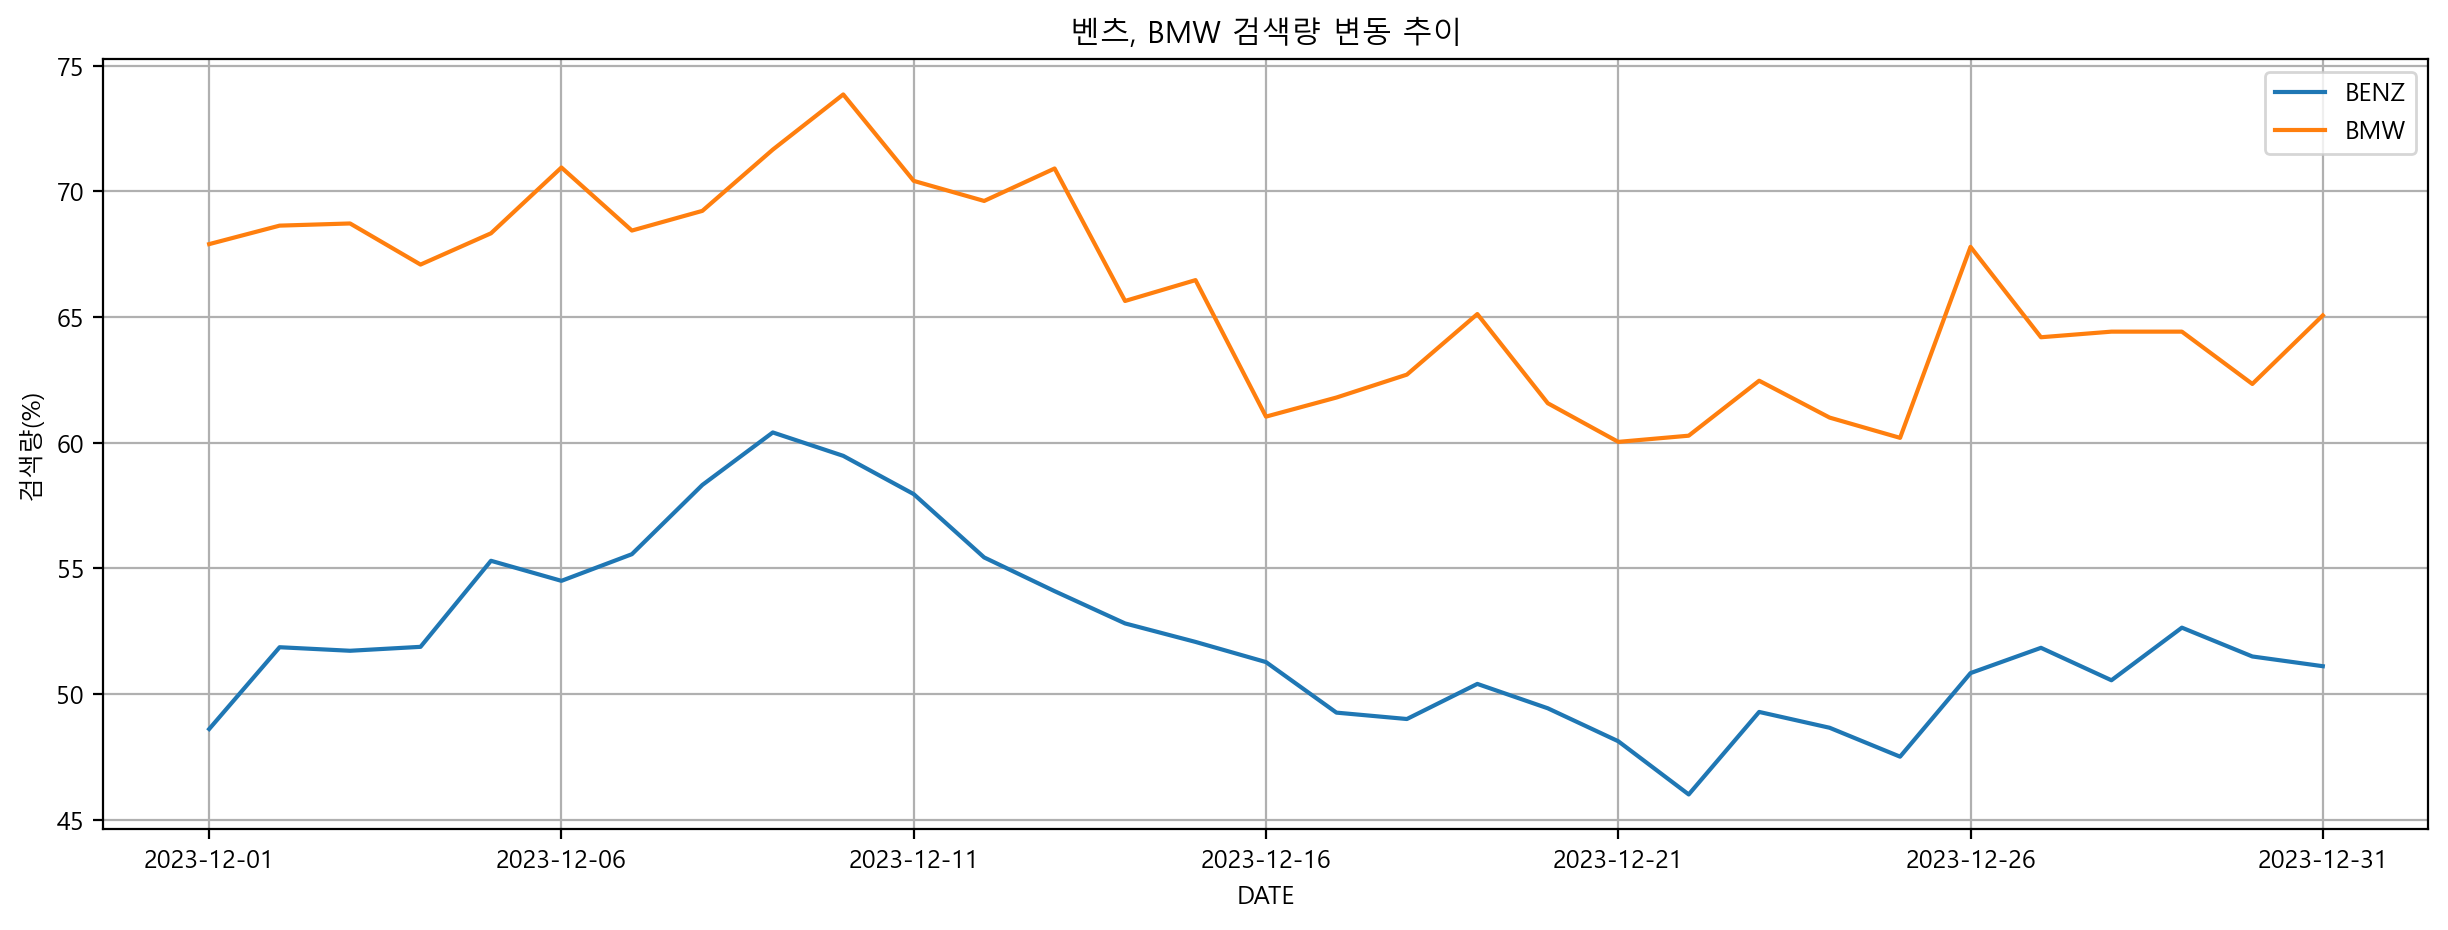

In [5]:
df1[['BENZ', 'BMW']].plot(figsize=(15, 5))
plt.grid()
plt.legend()
plt.title("벤츠, BMW 검색량 변동 추이")
plt.ylabel("검색량(%)")
plt.show()
plt.close()

### [4] 전체 변수에 대한 시각화

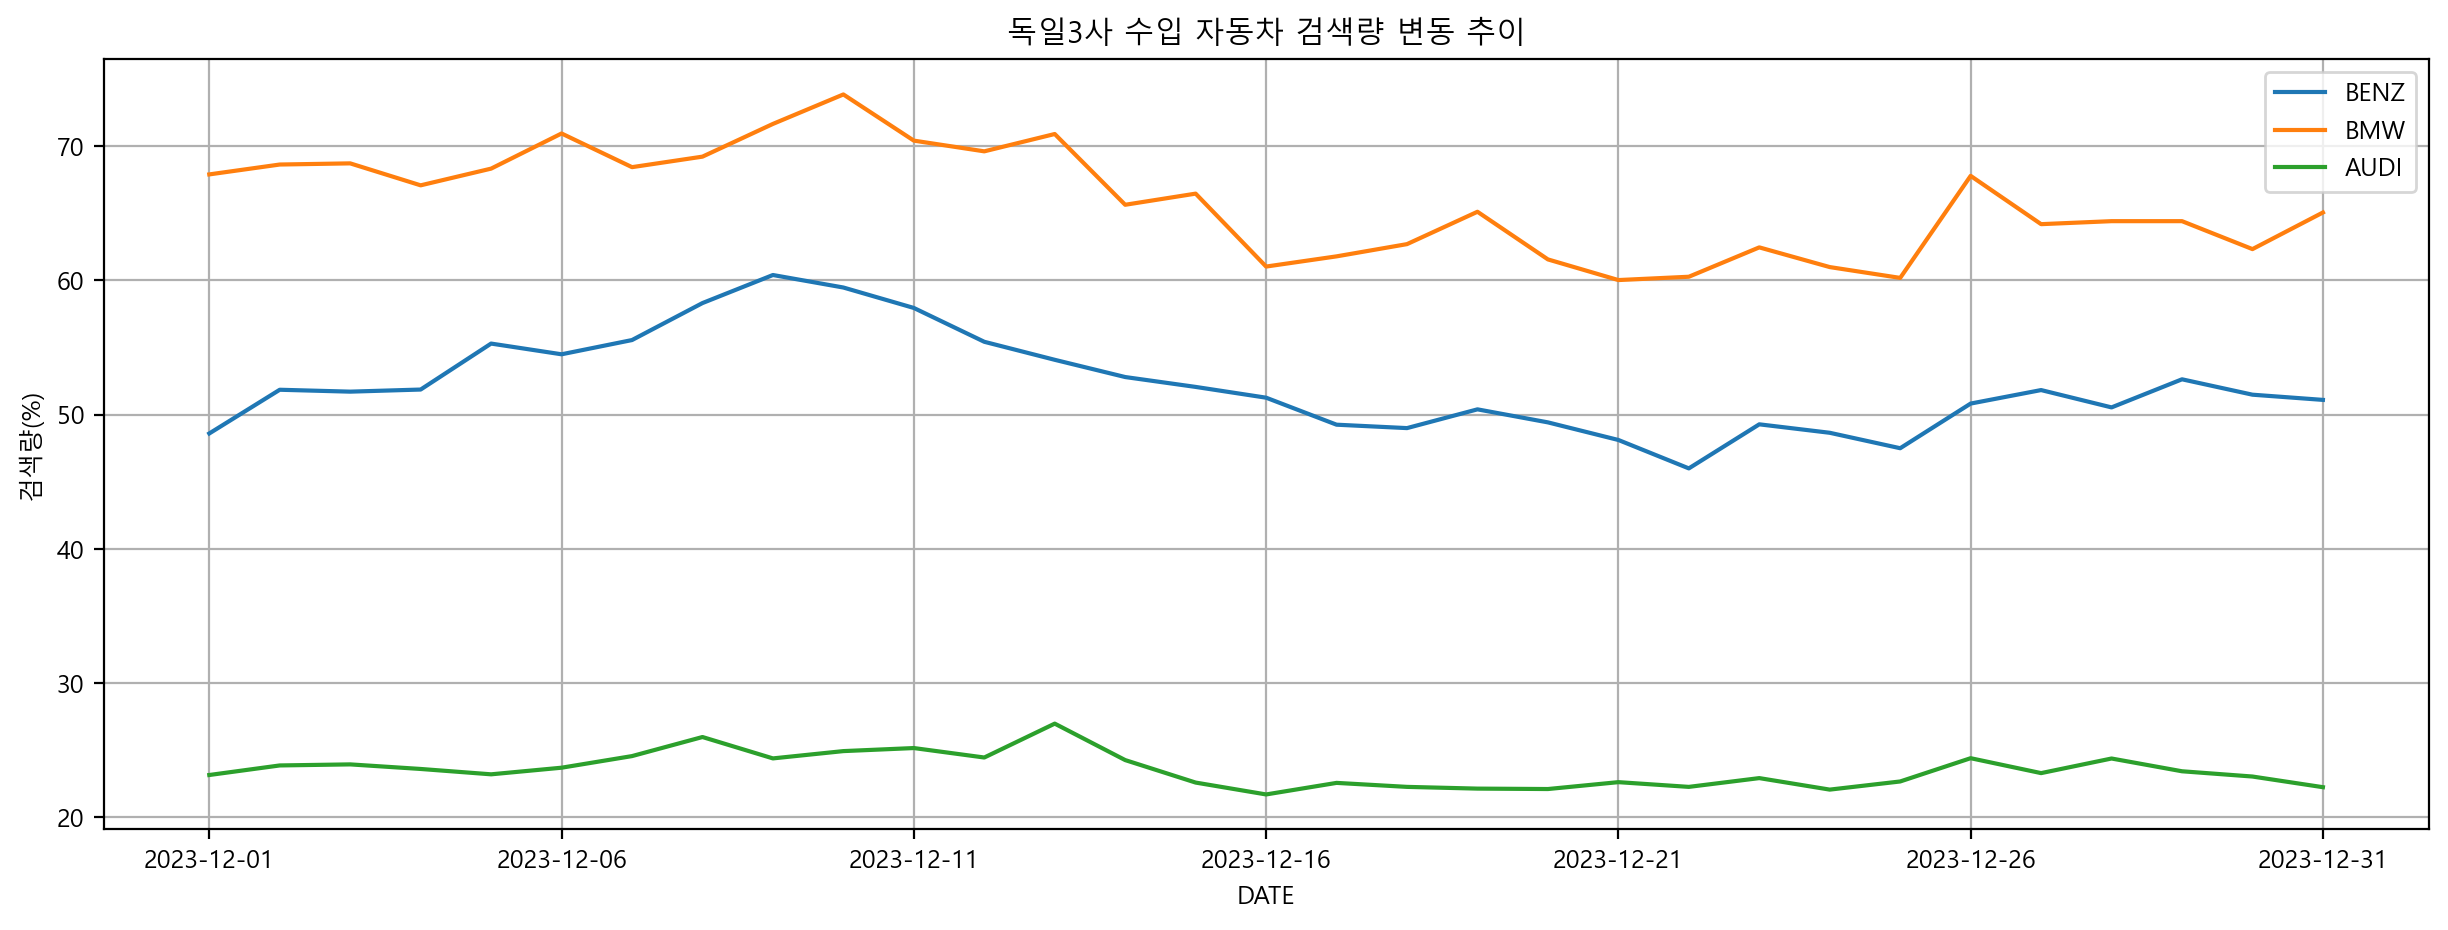

In [6]:
df1.plot(figsize=(15, 5))
plt.grid()
plt.legend()
plt.title("독일3사 수입 자동차 검색량 변동 추이")
plt.ylabel("검색량(%)")
plt.show()
plt.close()

### #03. Bar Chart

### [1] 데이터 가져오기

#### (1) 데이터프레임 생성

In [7]:
df2 = read_excel("https://data.hossam.kr/pydata/grade.xlsx", index_col="이름")
df2

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,77,88,64
영희,2,여자,88,120,62,72
민철,1,남자,92,70,83,79
수현,3,여자,63,60,31,71
호영,4,남자,75,50,90,88
영호,4,남자,80,88,91,72
용식,2,남자,82,88,79,90
나영,1,여자,90,92,81,95
석영,1,남자,91,90,89,80


#### (2) 데이터 전처리

명목형 변수에 대한 형변환

In [8]:
df2['학년'] = df2['학년'].astype('category')
df2['성별'] = df2['성별'].astype('category')
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 철수 to 석영
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   학년      9 non-null      category
 1   성별      9 non-null      category
 2   국어      9 non-null      int64   
 3   영어      9 non-null      int64   
 4   수학      9 non-null      int64   
 5   과학      9 non-null      int64   
dtypes: category(2), int64(4)
memory usage: 706.0+ bytes


### [2] 단일 변수에 대한 시각화

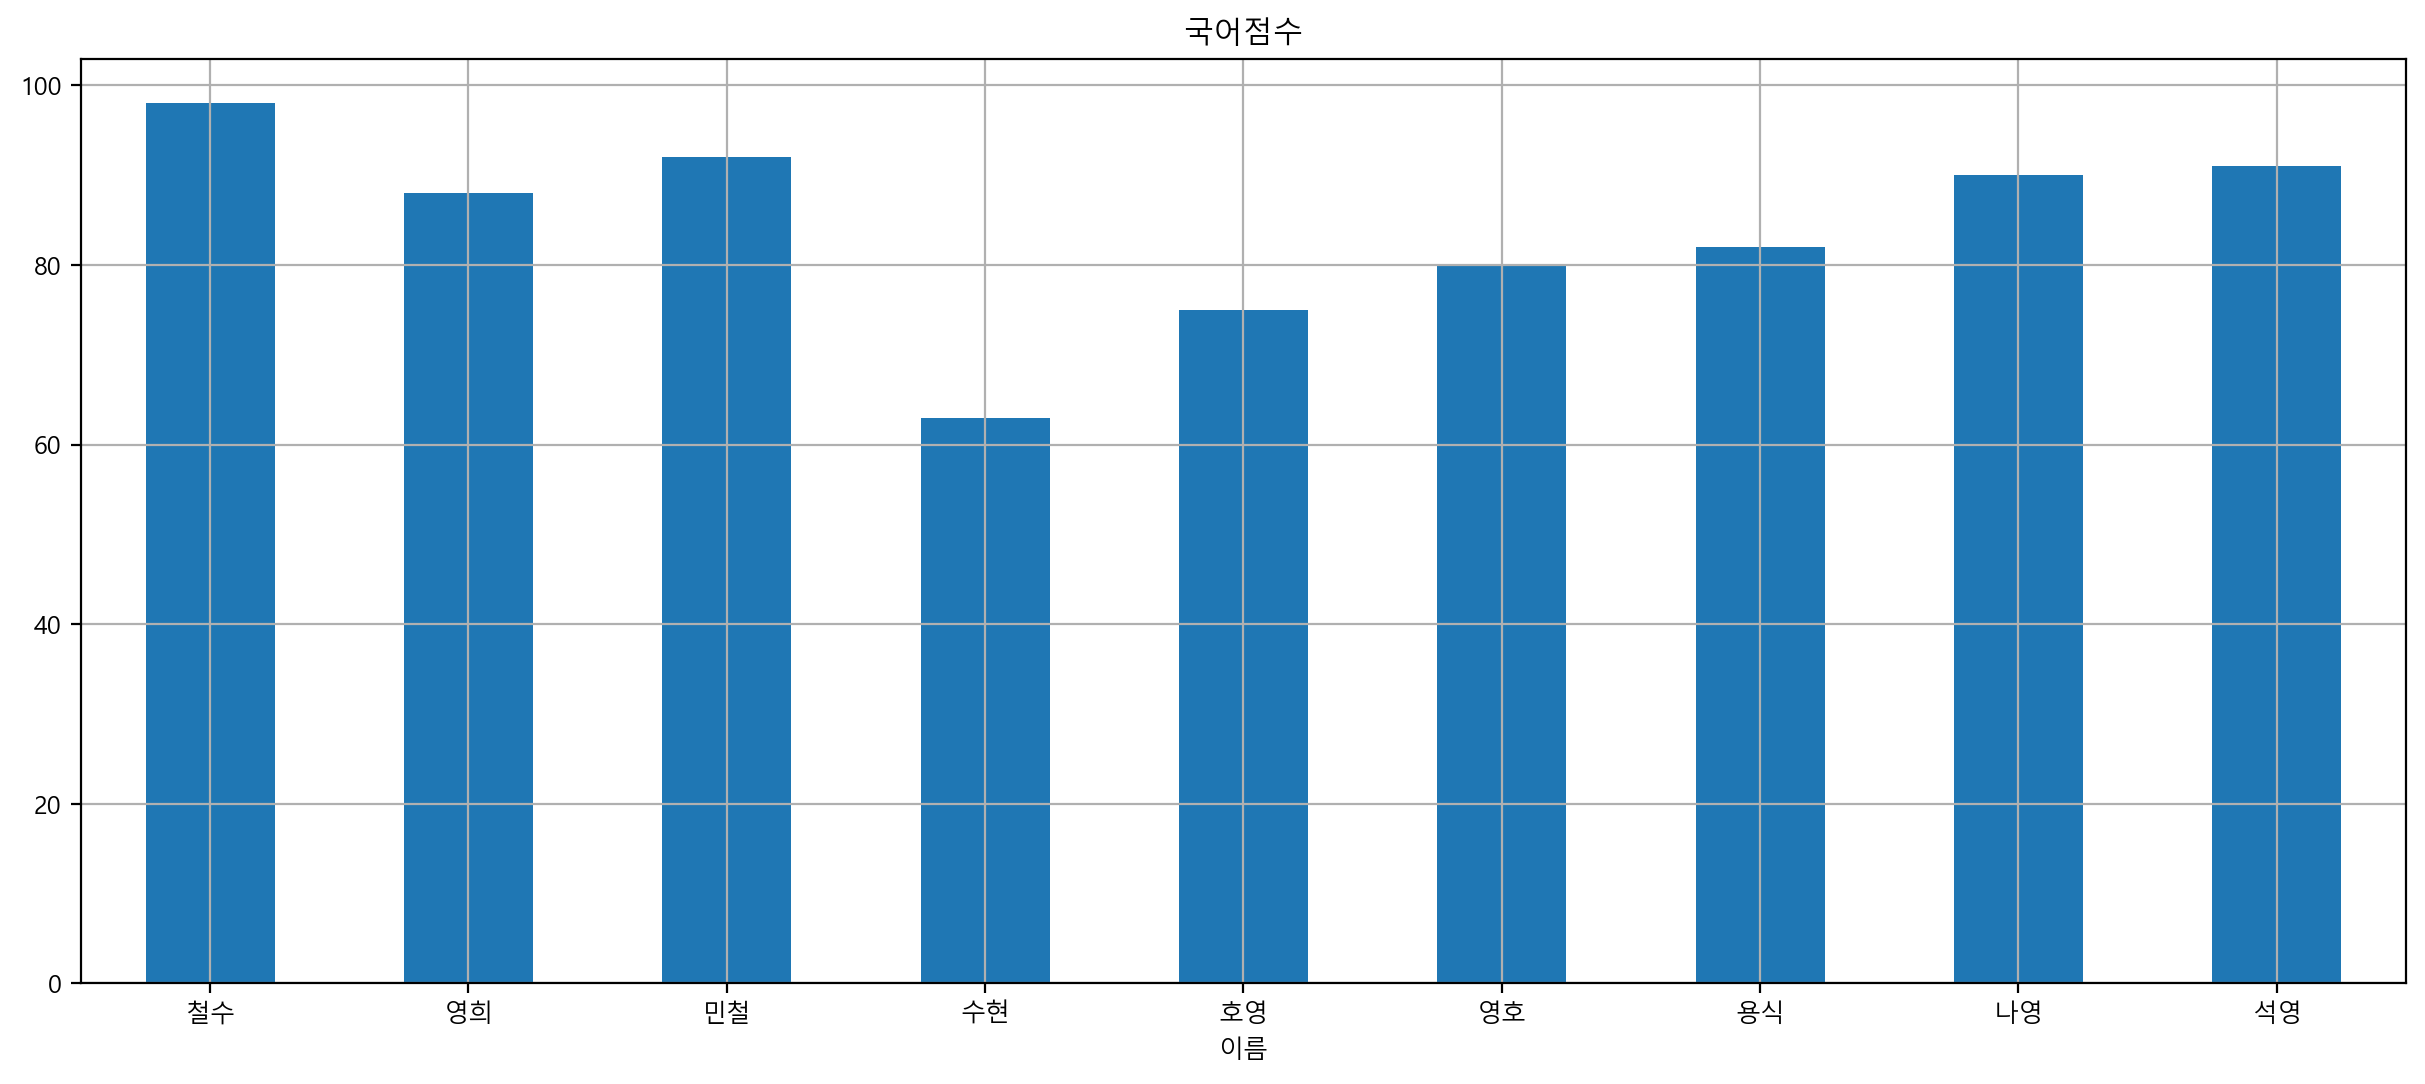

In [9]:
df2['국어'].plot.bar(rot=0)
plt.grid()
plt.title("국어점수")
plt.show()
plt.close()

### [3] 복수 변수에 대한 시각화

표시할 변수만 별도의 데이터프레임으로 추출한 후 그래프를 적용한다.

각 변수의 위치를 조절하지 않더라도 범주별 막대가 겹치지 않는다.

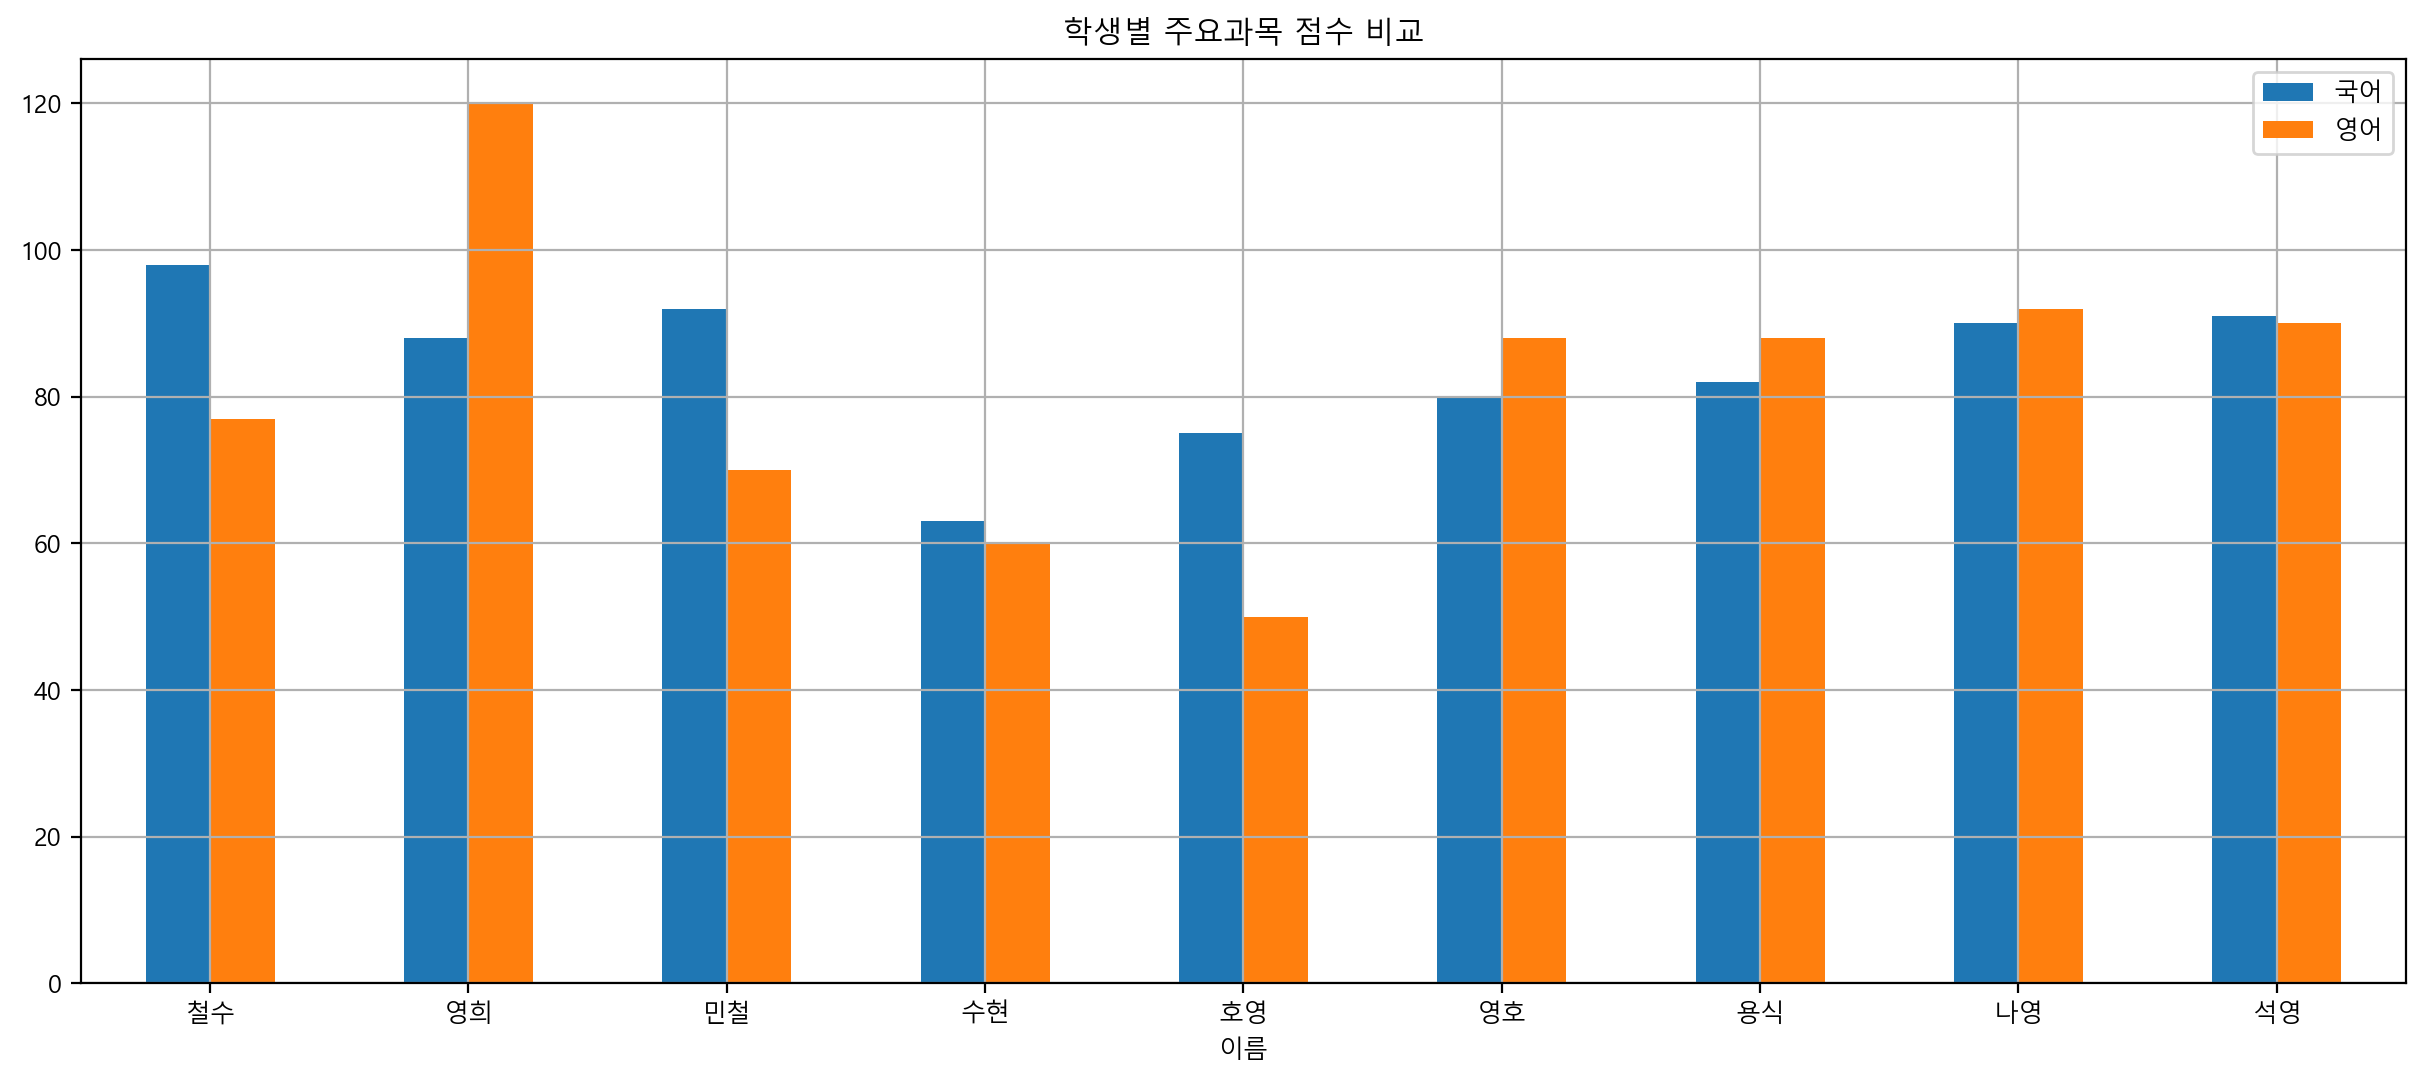

In [10]:
df2[['국어', '영어']].plot.bar(rot=0)
plt.grid()
plt.legend()
plt.title("학생별 주요과목 점수 비교")
plt.show()
plt.close()

### [4] 전체 변수에 대한 시각화

자동으로 범주형 변수는 제외한다.

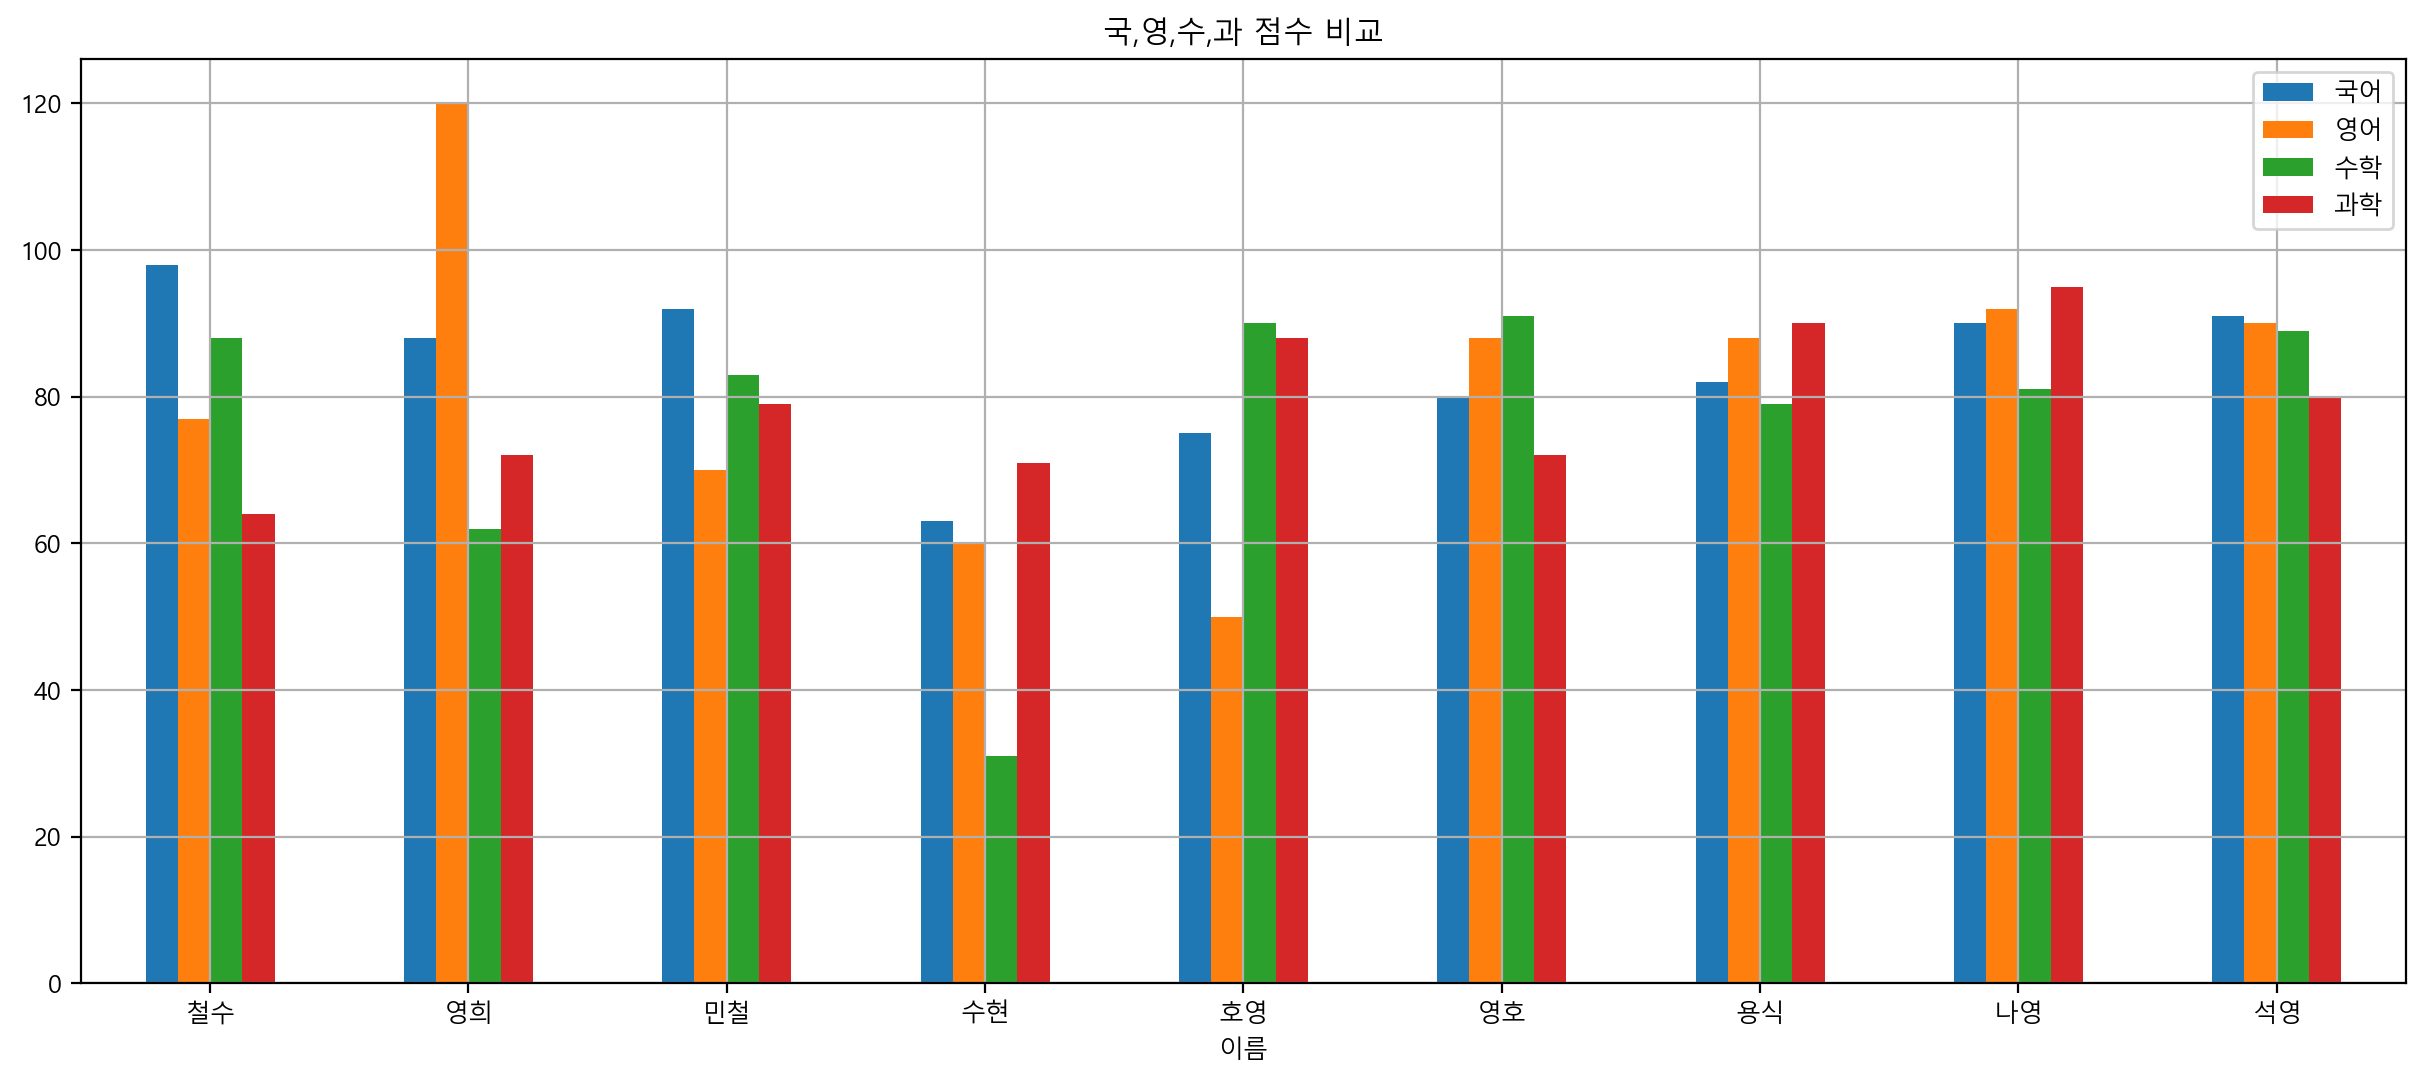

In [11]:
df2.plot.bar(rot=0)
plt.grid()
plt.legend()
plt.title("국,영,수,과 점수 비교")
plt.show()
plt.close()